In [7]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import datasets
from sklearn.cluster import KMeans

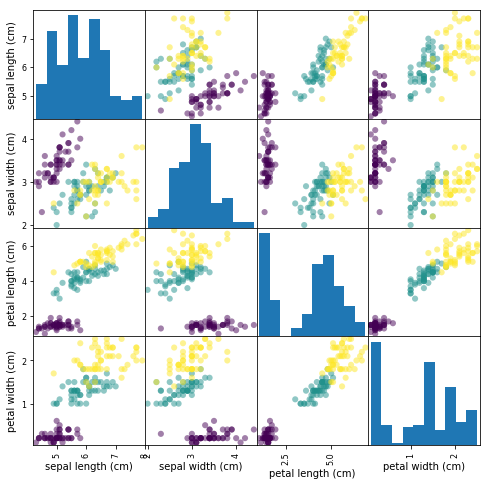

In [8]:
iris = datasets.load_iris()

X = iris.data
y = iris.target

iris_df = pd.DataFrame(X, columns=iris.feature_names)
_ = pd.plotting.scatter_matrix(iris_df, figsize=(8,8), c=y, s=150)
plt.show()

In [9]:
iris_df = iris_df.drop(labels=['sepal width (cm)', 'petal width (cm)'], axis=1)

# Clustering with KMeans

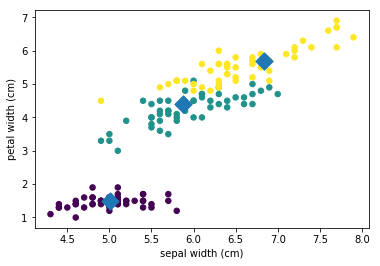

In [10]:
model = KMeans(n_clusters=3)
model.fit(iris_df)
cluster_labels = model.predict(iris_df)

#Viewing Cluster Centers
plt.scatter(iris_df.iloc[:,0], iris_df.iloc[:,1], c=y, s=30)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], marker='D', s=150 )
plt.xlabel('sepal width (cm)')
plt.ylabel('petal width (cm)')
plt.show()

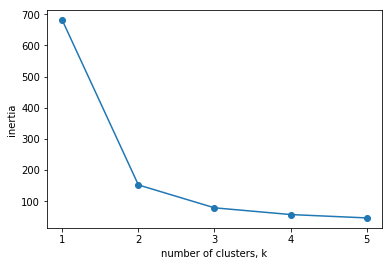

In [11]:
# Measuring Cluster performance by Inertia
inertia = []

ks = range(1, 6)

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(X)
    inertia.append(model.inertia_)
    
plt.plot(ks, inertia, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [12]:
#Cross tabulation given the predicted cluster labels and the known species labels 
df = pd.DataFrame({'labels': cluster_labels, 'varieties': y})
ct = pd.crosstab(df['labels'], df['varieties'])
ct

varieties,0,1,2
labels,,,
0,50,1,0
1,0,4,37
2,0,45,13


In [13]:
#Can StandardScaler() (features) and Normalizer()(samples) to improve accuracy

# Hierarchical clustering

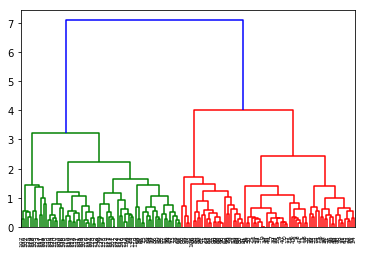

In [14]:

from scipy.cluster.hierarchy import linkage, dendrogram
mergings = linkage(iris.data, method='complete')
dendrogram(mergings, leaf_rotation=90, leaf_font_size=6)
plt.show()

In [15]:
from scipy.cluster.hierarchy import fcluster
labels_4 = fcluster(mergings, 4, criterion='distance')

In [16]:
df = pd.DataFrame({'labels': labels_4, 'varieties': y})
ct = pd.crosstab(df['labels'], df['varieties'])
ct

varieties,0,1,2
labels,,,
1,0,23,49
2,0,27,1
3,50,0,0


# T-SNE

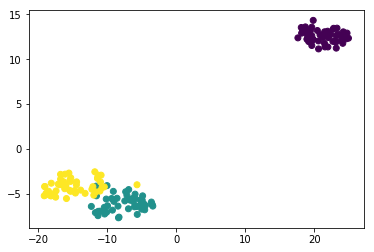

In [17]:
from sklearn.manifold import TSNE

model = TSNE(learning_rate=200)
transformed = model.fit_transform(iris.data)

xs = transformed[:,0]
ys = transformed[:,1]

plt.scatter(xs, ys, c=y)
plt.show()

# PCA

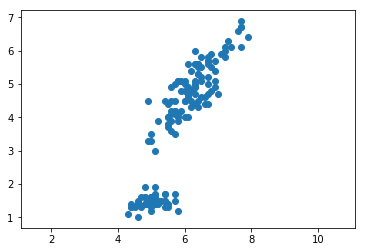

0.871754157305


In [25]:
#Display current correlation
from scipy.stats import pearsonr
sepal_width = iris_df.iloc[:,0]
petal_width = iris_df.iloc[:,1]

plt.scatter(sepal_width, petal_width)
plt.axis('equal')
plt.show()

correlation, pvalue = pearsonr(sepal_width, petal_width)
print(correlation)

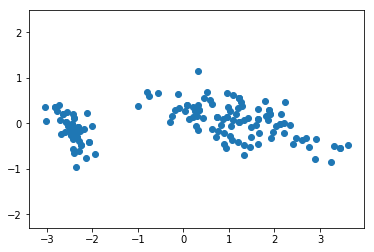

-8.32723463504e-17


In [29]:
#Decorrelating with PCA
from sklearn.decomposition import PCA
model = PCA()
pca_features = model.fit_transform(iris_df)

sepal_width = pca_features[:,0]
petal_width = pca_features[:,1]

plt.scatter(sepal_width, petal_width)
plt.axis('equal')
plt.show()

correlation, pvalue = pearsonr(sepal_width, petal_width)
print(correlation)

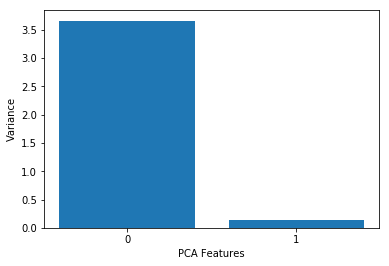

In [32]:
#Creating PCA features
pca = PCA()
pca.fit(iris_df)
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.xlabel('PCA Features')
plt.ylabel('Variance')
plt.show()

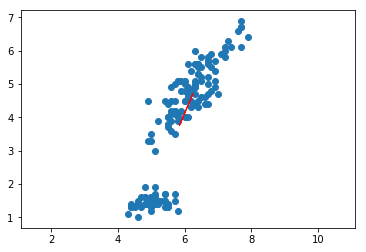

In [38]:
sepal_width = iris_df.iloc[:,0]
petal_width = iris_df.iloc[:,1]

pca = PCA()
pca.fit(iris_df)
mean = pca.mean_

first_pc = pca.components_[0,:]
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)

plt.scatter(sepal_width, petal_width)
plt.axis('equal')
plt.show()

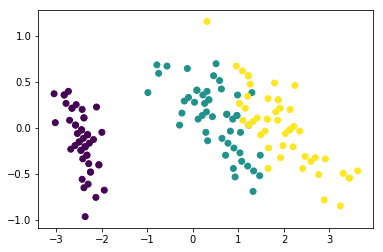

In [41]:
#Reducing The Dataset to Two features
pca_final = PCA(n_components=2)
pca.fit(iris_df)
transformed = pca.transform(iris_df)

xs = transformed[:,0]
ys = transformed[:,1]

plt.scatter(xs, ys, c=y)
plt.show()

# Non-negative Matrix Factorization

In [ ]:
Dimension Reduction technique, interpretable (unlike PCA), samples must be non-negative.
n_components must be specified. Will work with NumPy arrays and csr_matrix.

In [ ]:
from sklearn.decompostion import NMF
model = NMF(n_components=2)
model.fit(samples)
nmf_features = model.transform(samples)

print(model.components_) #Dimension of components match the dimension of the samples
print(nmf_features) #features can be combined with components to reconstruct original samples

print(samples[i,:])
print(nmf_features[i,:])

samples[i,:] @ nmf_features[i,:] = #close to approx values of samples